## PRCP- 1001- RiceLeaf disease detection

## Domain Expertise
- The dataset includes 119 jpg images of rice leaves effected by different types of diseases.
- The classes are:-
- **Bacterial Leaf Blight**
-  Bacterial leaf blight of rice (BB) is a disease caused by the Gram-negative bacterium Xanthomonas oryzae pv.Bacterial leaf blight is often first noticed in fields as brown areas about 3 to 4 feet in diameter. Leaf symptoms appear as irregular brown spots, often beginning on the leaf margins. Lesions initially have an irregular yellow halo and may appear watersoaked.
- **Brown Spot**
- Brown spot is a fungal disease that can infect both seedlings and mature plants. The disease causes blight on seedlings, which are grown from heavily infected seeds, and can cause 10-58% seedling mortality.
- **Leaf Smut**
- Leaf smut, caused by the fungus Entyloma oryzae, is a widely distributed, but somewhat minor, disease of rice.The fungus produces slightly raised, angular, black spots (sori) on both sides of the leaves.The black spots are about 0.5 to 5.0 millimeters long and 0.5 to 1.5 millimeters wide.
The class Leaf Smut contains 39 jpg images while rest all classes contain 40 jpg images.



In [1]:
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array
import matplotlib.pyplot as plt
%matplotlib inline
import random
import cv2
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
import splitfolders
data=splitfolders.ratio(r"C:\Users\Mahesh\Downloads\Data", output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 119 files [00:00, 187.59 files/s]


In [3]:
# Sorting the path of data into veriable
train_dir =(r'C:\Users\Mahesh\Downloads\Data') #Location of training images
validation_dir = (r'C:\Users\Mahesh\Downloads\Data')# Location of test images
test_dir =(r'C:\Users\Mahesh\Downloads\Data')# Location of test images

# GENERATING TRAINING AND VALIDATION IMAGES

In [4]:
#Generating batches of image data
train_datagen = ImageDataGenerator(
    rescale= (1./255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))




train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')


val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')


Found 119 images belonging to 3 classes.
Found 119 images belonging to 3 classes.


In [5]:
# plotting train images with their labels
def plots(ims, figsize=(20,25), rows=4, interp = False, title = None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 ==0 else len(ims) // rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        sp.set_title(class_names[title[i].tolist().index(1)],fontsize=16)
        plt.imshow(ims[i])


# Make list of classes
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

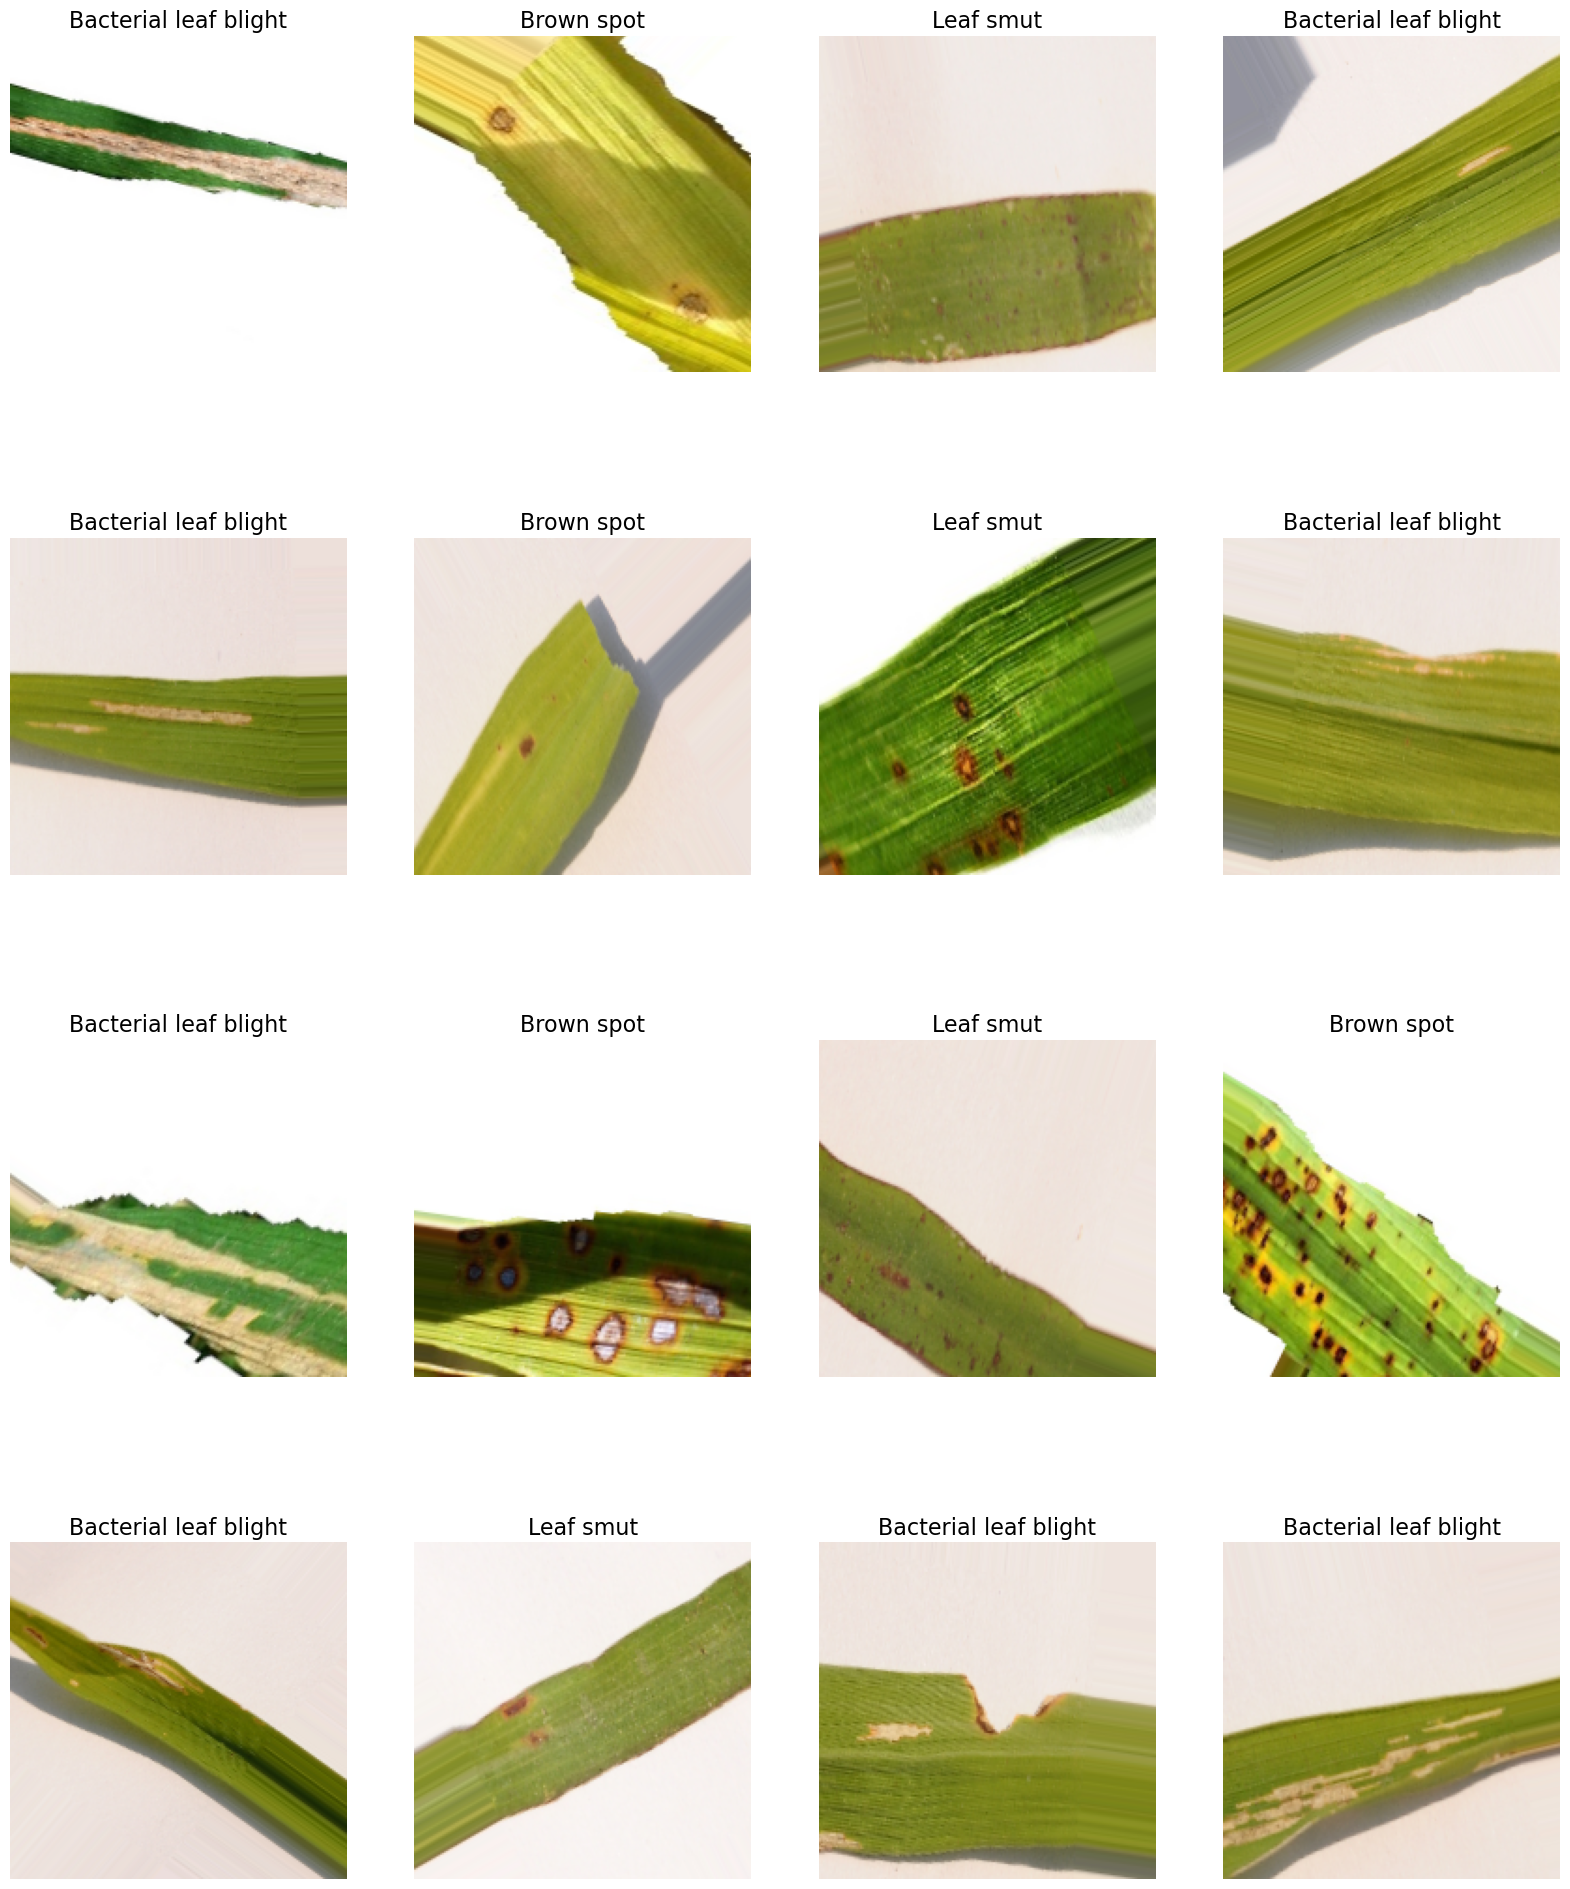

In [6]:
imgs, labels = next(train_generator)
plots(imgs, title = labels)

## CNN Model Creation


In [7]:
from keras.layers import Activation
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(180,180,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation ='softmax'))

### CREATED MODEL SUMMARY

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │          62,211 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 450,627 (1.72 MB)

 Trainable params: 450,627 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

###  COMPILE MODEL AND TRAIN MODEL

In [9]:
from tensorflow.keras import optimizers
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [15]:
# Fitting the data
    
history = model.fit(train_generator,
    epochs=50, # epochs used to how many itertion (1fp + loss + 1bp)
    validation_data = val_generator,
)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8560 - loss: 0.3111 - val_accuracy: 0.9076 - val_loss: 0.2311
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9276 - loss: 0.2346 - val_accuracy: 0.9244 - val_loss: 0.2597
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9146 - loss: 0.3030 - val_accuracy: 0.9244 - val_loss: 0.2236
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8381 - loss: 0.3264 - val_accuracy: 0.9328 - val_loss: 0.2271
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9043 - loss: 0.3018 - val_accuracy: 0.9244 - val_loss: 0.1786
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8766 - loss: 0.3520 - val_accuracy: 0.9580 - val_loss: 0.1695
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8982 - loss: 0.2543 - val_accuracy: 0.9160 - val_loss: 0.2044
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9342 - loss: 0.2355 - val_accuracy: 0.8824 - val_loss: 0.2773
Epoch 9/

### AFTER TRAINING
* Validation accuracy.96.64 %
* Training accuracy.89.50. %

### PLOTTING THE TRAINING ACCURACY AND VALIDATION ACCURACY 

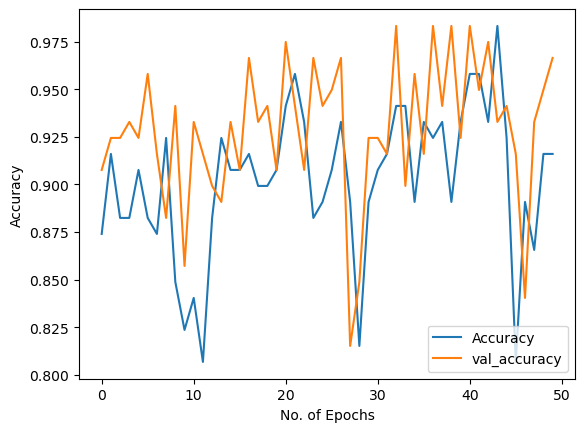

In [16]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

In [17]:
#Saving the model
model.save("my_model.keras")

### EVALUATION AND TESTING MODEL

In [22]:
test_datagen = ImageDataGenerator(rescale=(1./255))


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')
model.evaluate(test_generator)

Found 119 images belonging to 3 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9616 - loss: 0.1111


[0.11269868165254593, 0.9663865566253662]

 * Here the loss is 0.1018 and the accuracy of the model is 0.1126 percent means 96.63%.

### VISUALISE THE PREDICTION OF MODEL

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


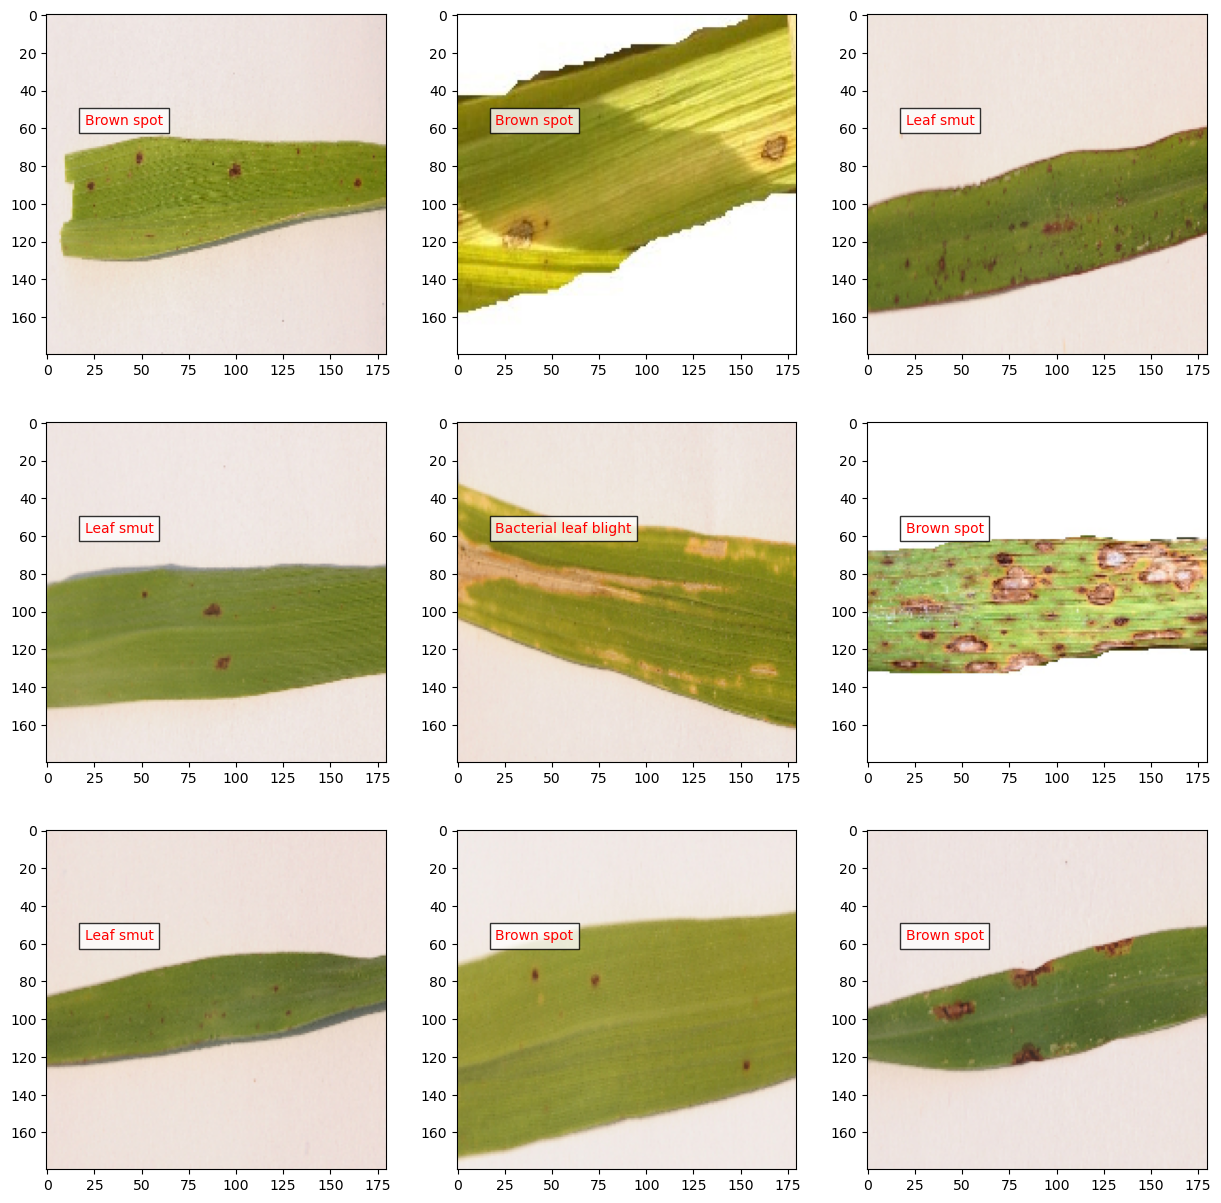

In [21]:
# Visualise the prediction of the model
imgs, labels = next(test_generator)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])

## Conclusion:-
- The dataset contains 119 jpg images of different diseases.
- Here,we had tried  for model creation in which **Adam Optimizer** shows the accuracy of **96.63%**.Thus we can conclude that it works well for the Rice Leaf Disease Detection.
- By using the Adam Optimizer we tried it with the samples of test data and it showed a great output.
- Thus we can conclude that CNN model with Adam Optimizer is the best one for predicting the Rice Leaf Prediction.

# Report on Challenges faced

* This Dataset contains images of type of rice diseases.
* Challenges faced that we have to convert dataset into 3 catgeories,which we solved by using splitfolders technique.
* Another challenge is that we have to generate traning and validation of images,using ImageDataGenerator we generated the images.
* Another challenge is to do model creation, we have used CNN Model for model creation.
* Another challenge  is to use Activation Function.Activation functions play a crucial role in neural networks by introducing non-linearity into the model, allowing it to learn and represent complex patterns in the data.
* Type of Activation functions are step function, Sigmoid function, Relu function,etc. 
* Convolution layer is used to extract the feature from the input dataset and Pooling layer is to reduce the size of volume which makes the computation fast reduces memory and also prevents overfitting. 
* In CNN model we have used Activation function as 'relu', 3 convolution layer and 3 maxpooling layer.
* Optimizers are crucial in CNN models for dynamically fine-tuning parameters and minimizing the loss function.
* In model traning we have used optimizer 'adam'
* In traning the model we have used 50 epoch.